https://www.kaggle.com/datasets/swastikmohanty845/jobathon-may-2021-credit-card-lead-prediction?select=Test_Data.csv

## Predicting Customer Intention to Get Credit Card

## Loading the Data and Managing Data Type

1. Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

2. Load Dataset 

In [2]:
df = pd.read_csv("Train_Data.csv")

In [3]:
df

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0
...,...,...,...,...,...,...,...,...,...,...,...
245720,BPAWWXZN,Male,51,RG284,Self_Employed,X3,109,NaN,1925586,No,0
245721,HFNB7JY8,Male,27,RG268,Salaried,X1,15,No,862952,Yes,0
245722,GEHAUCWT,Female,26,RG281,Salaried,X1,13,No,670659,No,0
245723,GE7V8SAH,Female,28,RG273,Salaried,X1,31,No,407504,No,0


In [4]:
print(f"Dataset Shape: {df.shape}")
print(df.isnull().sum())

Dataset Shape: (245725, 11)
ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64


3. Separate X and y

In [5]:
X = df.drop(columns = ['Is_Lead','ID'])
Y = df[['Is_Lead']]

In [6]:
Y

,Is_Lead
0,0
1,0
2,0
3,0
4,0
...,...
245720,0
245721,0
245722,0
245723,0


## EDA 

1. Get summary for Numerical Data

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,245725.0,4.385631e+01,14.828672,23.0,30.0,43.0,54.0,85.0
Vintage,245725.0,4.695914e+01,32.353136,7.0,20.0,32.0,73.0,135.0
Avg_Account_Balance,245725.0,1.128403e+06,852936.356069,20790.0,604310.0,894601.0,1366666.0,10352009.0
Is_Lead,245725.0,2.372083e-01,0.425372,0.0,0.0,0.0,0.0,1.0


2. Get summary for Categorical Data

In [8]:
df.describe(include = 'object').transpose()

,count,unique,top,freq
ID,245725,245725,NNVBBKZB,1
Gender,245725,2,Male,134197
Region_Code,245725,35,RG268,35934
Occupation,245725,4,Self_Employed,100886
Channel_Code,245725,4,X1,103718
Credit_Product,216400,2,No,144357
Is_Active,245725,2,No,150290


In [9]:
df['Occupation'].unique()

array(['Other', 'Salaried', 'Self_Employed', 'Entrepreneur'], dtype=object)

3. Distribution of Age 

C:\Users\hzw10\AppData\Local\Temp\ipykernel_9792\1858947098.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.loc[df.Gender=='Male','Age'].dropna(),
C:\Users\hzw10\anaconda3\lib\site-packages\seaborn\distributions.py:2511: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
C:\Users\hzw10\AppData\Local\Temp\ipykernel_9792\1858947098.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `d

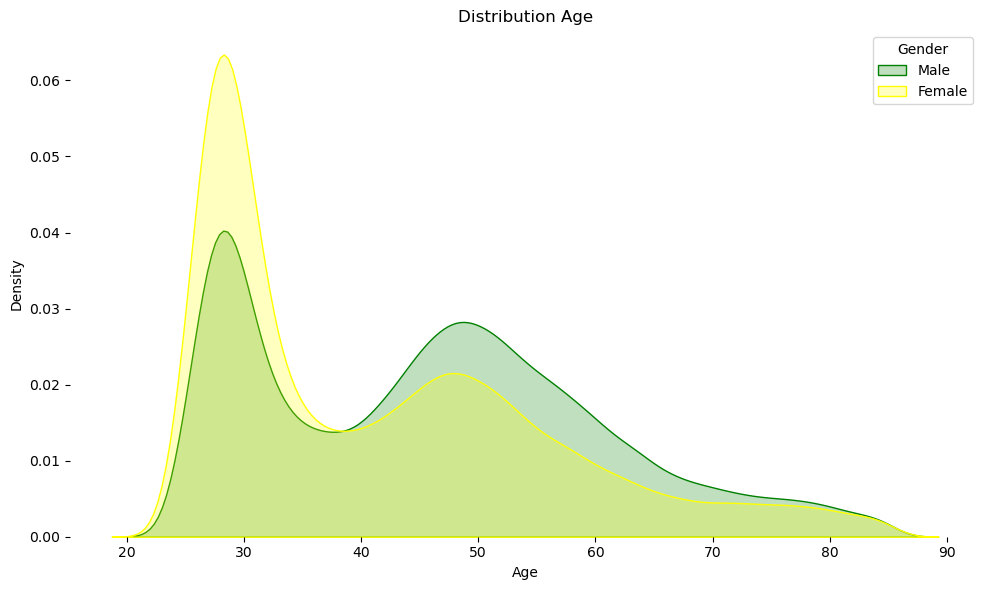

In [10]:
#plt.figure(figsize=(15,6))
fig, ax = plt.subplots(figsize = (10,6))
sns.distplot(df.loc[df.Gender=='Male','Age'].dropna(),
            hist = False, color= 'green',
            kde_kws={'shade': True},
            ax = ax , label = 'Male')
sns.distplot(df.loc[df.Gender=='Female','Age'].dropna(),
            hist = False, color= 'yellow',
            kde_kws={'shade': True},
            ax = ax , label = 'Female')
ax.set_title("Distribution Age")
ax.legend(title = 'Gender')
# # Remove the spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.tight_layout()
plt.show()

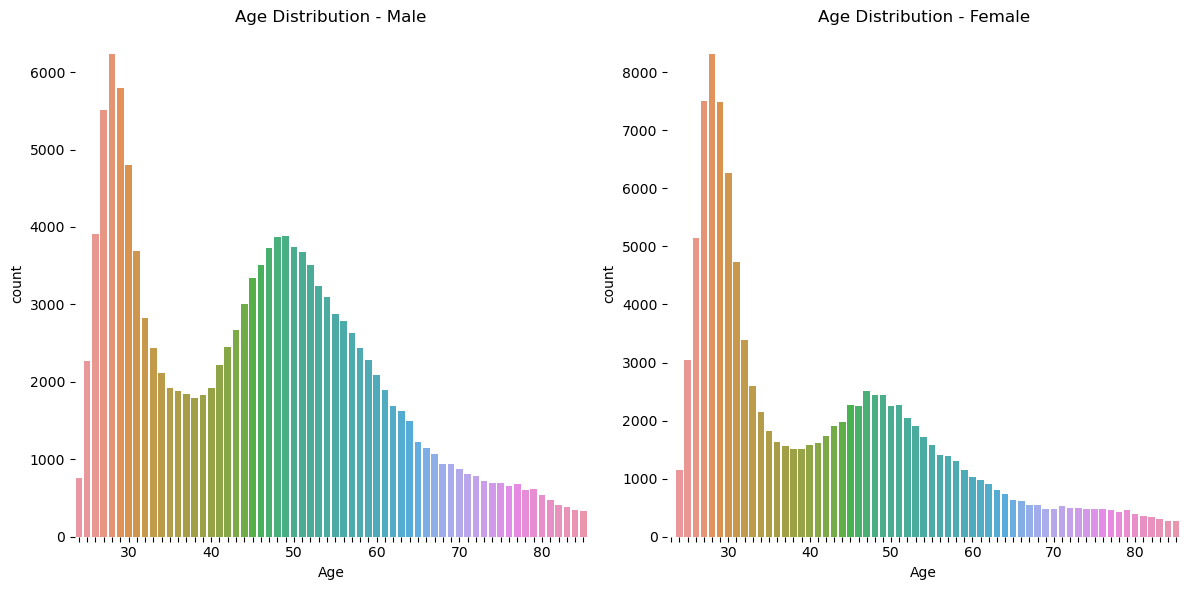

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Plot for Male
sns.countplot(x=df.loc[df.Gender=='Male', 'Age'], ax=ax[0])
ax[0].set_title('Age Distribution - Male')

# Plot for Female
sns.countplot(x=df.loc[df.Gender=='Female', 'Age'], ax=ax[1])
ax[1].set_title('Age Distribution - Female')

# Adjust the x-tick labels visibility for both plots
for a in ax:
    for age, label in enumerate(a.get_xticklabels()):
        if int(float(label.get_text())) % 10 == 0:
            label.set_visible(True)
        else:
            label.set_visible(False)

# Remove the spines for both plots
for a in ax:
    a.spines['top'].set_visible(False)
    a.spines['right'].set_visible(False)
    a.spines['bottom'].set_visible(False)
    a.spines['left'].set_visible(False)

# Ensure the layout fits the figure area
plt.tight_layout()

# Display the plots
plt.show()


5. Plot a pairplot for variables

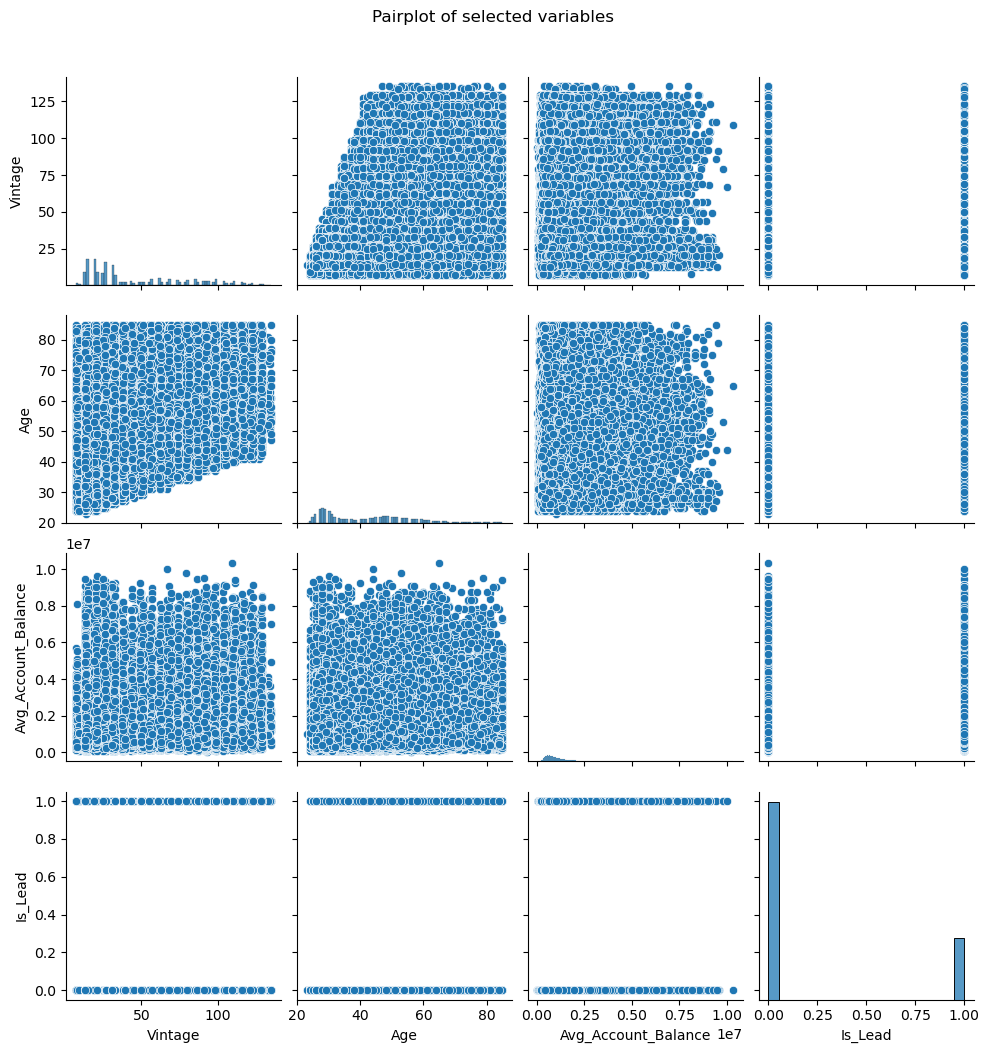

In [12]:
pair_plot = sns.pairplot(df[[ 'Vintage','Age', 'Avg_Account_Balance', 'Is_Lead']] )
pair_plot.fig.suptitle('Pairplot of selected variables', y=1.05);

6. Correlation Heatmap 

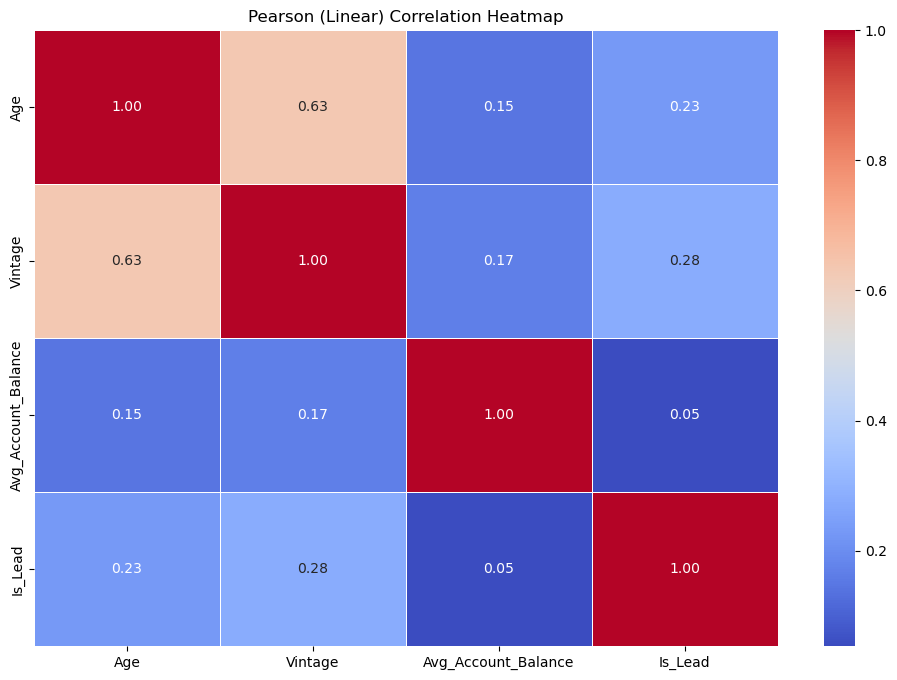

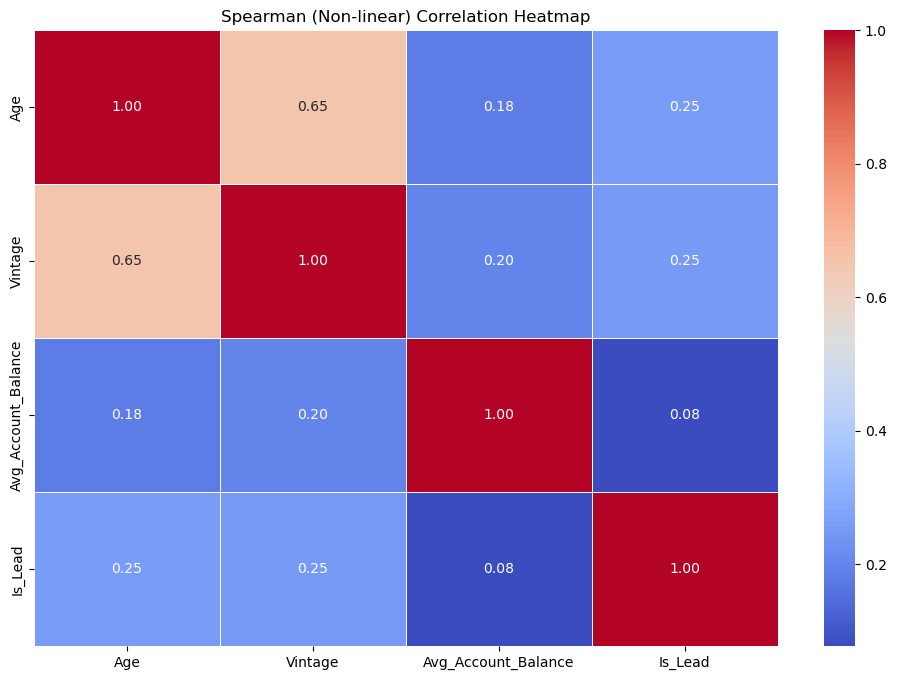

In [13]:
# Compute the Pearson correlation matrix (linear correlation)
pearson_corr_matrix = df.select_dtypes(include='number').corr(method='pearson')

# Compute the Spearman correlation matrix (non-linear, monotonic)
spearman_corr_matrix = df.select_dtypes(include='number').corr(method='spearman')

# Plot the Pearson (Linear) correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pearson_corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Pearson (Linear) Correlation Heatmap')
plt.show()

# Plot the Spearman (Non-linear, monotonic) correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(spearman_corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Spearman (Non-linear) Correlation Heatmap')
plt.show()

7. Distribution of Vintage across different Occupation 

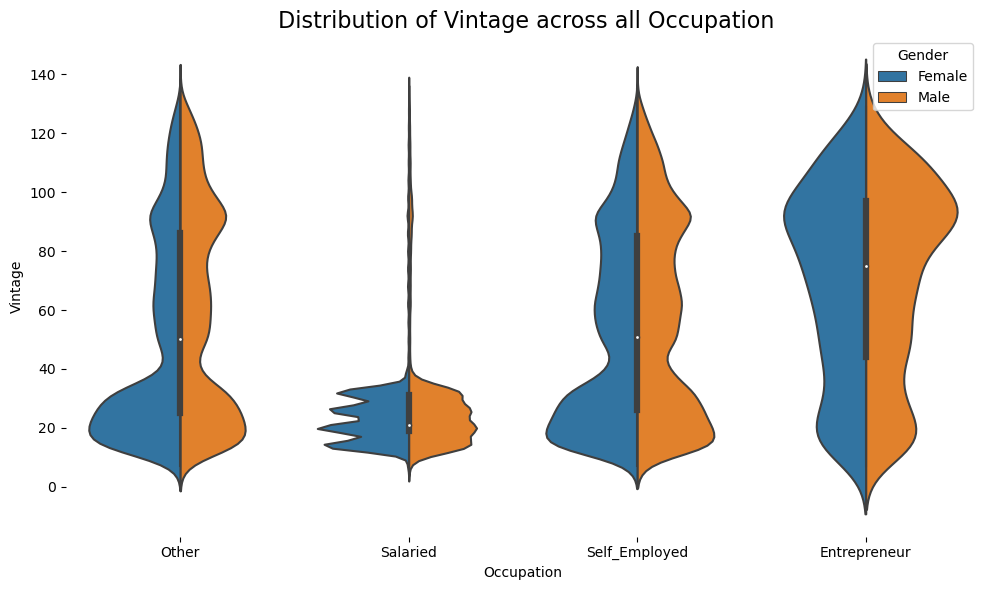

In [14]:
plt.figure(figsize=(10,6))
ax = sns.violinplot(x = 'Occupation' , y = 'Vintage',
                   hue = 'Gender', split = True, data = df)
ax.set_title(" Distribution of Vintage across all Occupation",
            fontsize = 16)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.tight_layout()
plt.show()

8. Purchase Rate Across different occupation 

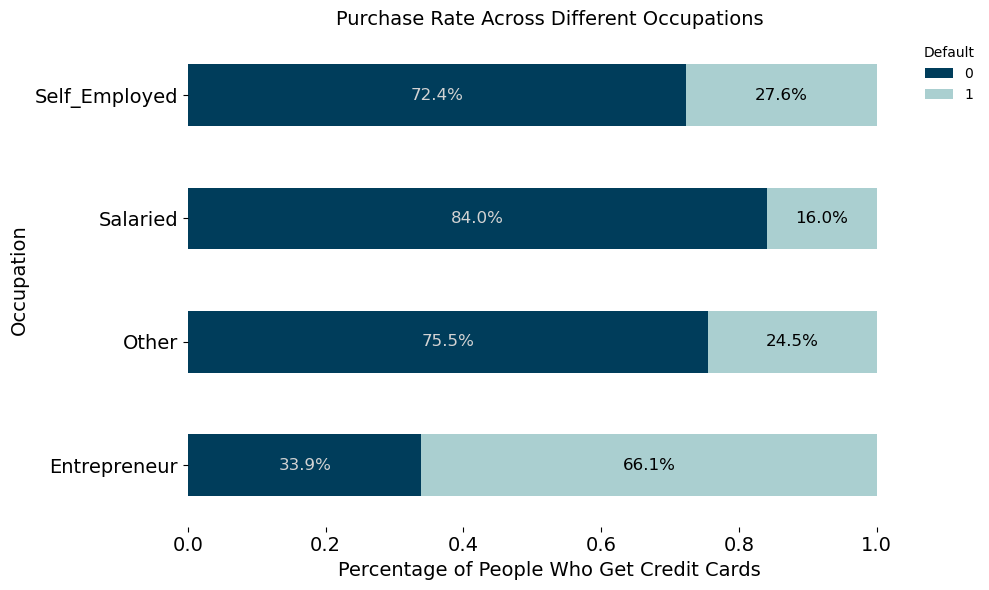

In [15]:
# Compute the normalized counts (percentages)
normalized_counts = df.groupby('Occupation')['Is_Lead'].value_counts(normalize=True).unstack()

# Adjusting the colors to McKinsey tones (dark teal and light teal-blue)
mckinsey_colors = ['#003D5B', '#AACFD0']  # Dark teal and light teal-blue

# Create the horizontal bar plot
ax = normalized_counts.plot(kind='barh', stacked=True, figsize=(10, 6), color=mckinsey_colors)

# Set the title of the plot (with black font color)
ax.set_title("Purchase Rate Across Different Occupations", fontsize=14, color='black')
ax.legend(title='Default', bbox_to_anchor=(1, 1), frameon=False)

# Add x-axis label
ax.set_xlabel("Percentage of People Who Get Credit Cards", fontsize=14, color='black')
ax.set_ylabel("Occupation", fontsize=14, color='black')
# Remove the spines for a clean look
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
# Adjust the ticks' font size for both x and y axis
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)
# Add text annotations for the percentages inside the boxes
for bars, class_label in zip(ax.containers, [0, 1]):
    for bar in bars:
        width = bar.get_width()
        if width > 0:  # Only annotate bars with a positive width
            x = bar.get_x() + width / 2
            y = bar.get_y() + bar.get_height() / 2
            percentage = f'{width * 100:.1f}%'
            
            # Set font color based on class label
            font_color = 'lightgray' if class_label == 0 else 'black'
            ax.text(x, y, percentage, ha='center', va='center', color=font_color, fontsize=12)

# Adjust the layout
plt.tight_layout()

# Display the plot
plt.show()


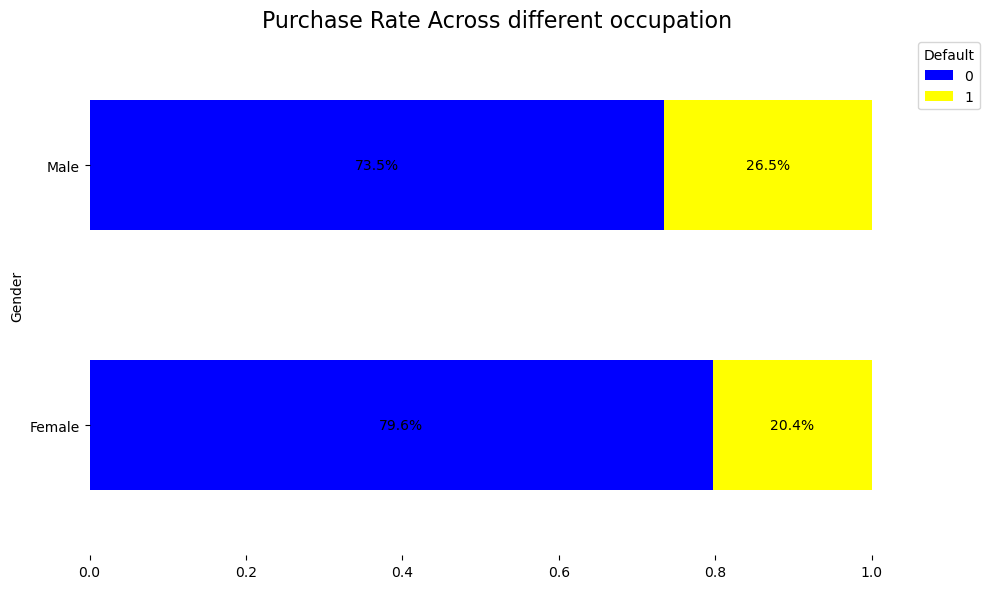

In [16]:
# Compute the normalized counts (percentages)
normalized_counts = df.groupby('Gender')['Is_Lead'].value_counts(normalize=True).unstack()

# Create the horizontal bar plot
ax = normalized_counts.plot(kind='barh', stacked=True, figsize=(10, 6), color=['blue', 'yellow'])

# Set the title of the plot
ax.set_title("Purchase Rate Across different occupation ", fontsize=16)
ax.legend(title = 'Default', bbox_to_anchor=(1,1))
# Remove the spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# Add text annotations for the percentages inside the boxes
for bars in ax.containers:
    for bar in bars:
        width = bar.get_width()
        if width > 0:  # Only annotate bars with a positive width
            x = bar.get_x() + width / 2
            y = bar.get_y() + bar.get_height() / 2
            percentage = f'{width * 100:.1f}%'
            ax.text(x, y, percentage, ha='center', va='center', color='black')

# Adjust the layout
plt.tight_layout()

# Display the plot
plt.show()


10. Distribution of age across occupation

C:\Users\hzw10\AppData\Local\Temp\ipykernel_9792\3355129458.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.loc[df.Occupation=='Other','Age'].dropna(),
C:\Users\hzw10\anaconda3\lib\site-packages\seaborn\distributions.py:2511: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
C:\Users\hzw10\AppData\Local\Temp\ipykernel_9792\3355129458.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use eit

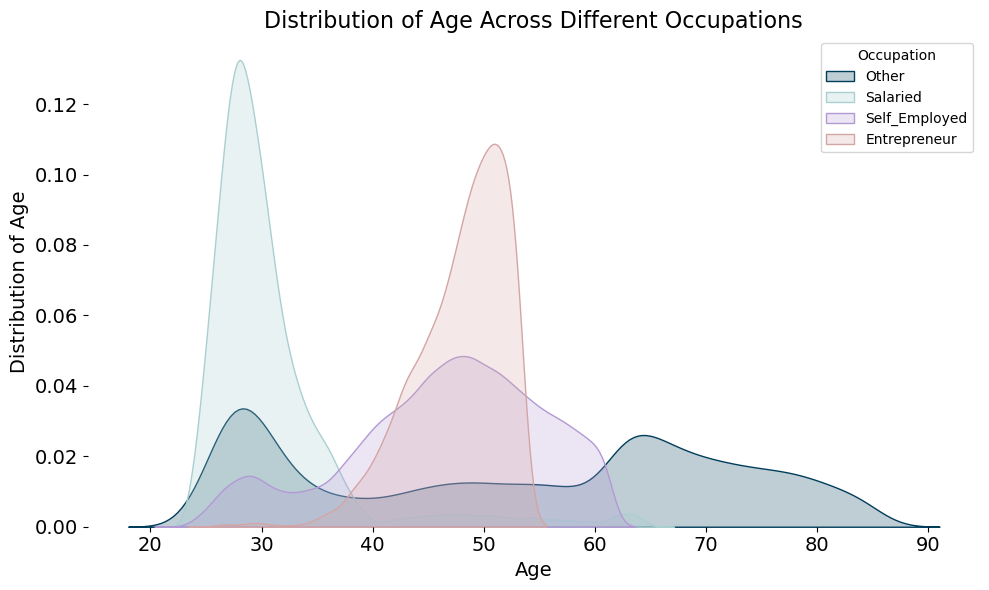

In [17]:
#plt.figure(figsize=(15,6))
fig, ax = plt.subplots(figsize = (10,6))

# Adjusting colors to McKinsey-style muted tones
sns.distplot(df.loc[df.Occupation=='Other','Age'].dropna(),
            hist = False, color= '#003D5B',  # Dark teal
            kde_kws={'shade': True},
            ax = ax , label = 'Other')

sns.distplot(df.loc[df.Occupation=='Salaried','Age'].dropna(),
            hist = False, color= '#AACFD0',  # Light teal
            kde_kws={'shade': True},
            ax = ax , label = 'Salaried')

sns.distplot(df.loc[df.Occupation=='Self_Employed','Age'].dropna(),
            hist = False, color= '#B399D4',  # Muted purple
            kde_kws={'shade': True},
            ax = ax , label = 'Self_Employed')

sns.distplot(df.loc[df.Occupation=='Entrepreneur','Age'].dropna(),
            hist = False, color= '#D4A5A5',  # Muted pinkish
            kde_kws={'shade': True},
            ax = ax , label = 'Entrepreneur')

ax.set_title("Distribution of Age Across Different Occupations", color='black',fontsize = 16)
ax.set_xlabel("Age", fontsize=14, color='black')
ax.set_ylabel("Distribution of Age", fontsize=14, color='black')
ax.legend(title = 'Occupation')
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)
# Remove the spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.tight_layout()
plt.show()


In [18]:
df

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0
...,...,...,...,...,...,...,...,...,...,...,...
245720,BPAWWXZN,Male,51,RG284,Self_Employed,X3,109,NaN,1925586,No,0
245721,HFNB7JY8,Male,27,RG268,Salaried,X1,15,No,862952,Yes,0
245722,GEHAUCWT,Female,26,RG281,Salaried,X1,13,No,670659,No,0
245723,GE7V8SAH,Female,28,RG273,Salaried,X1,31,No,407504,No,0


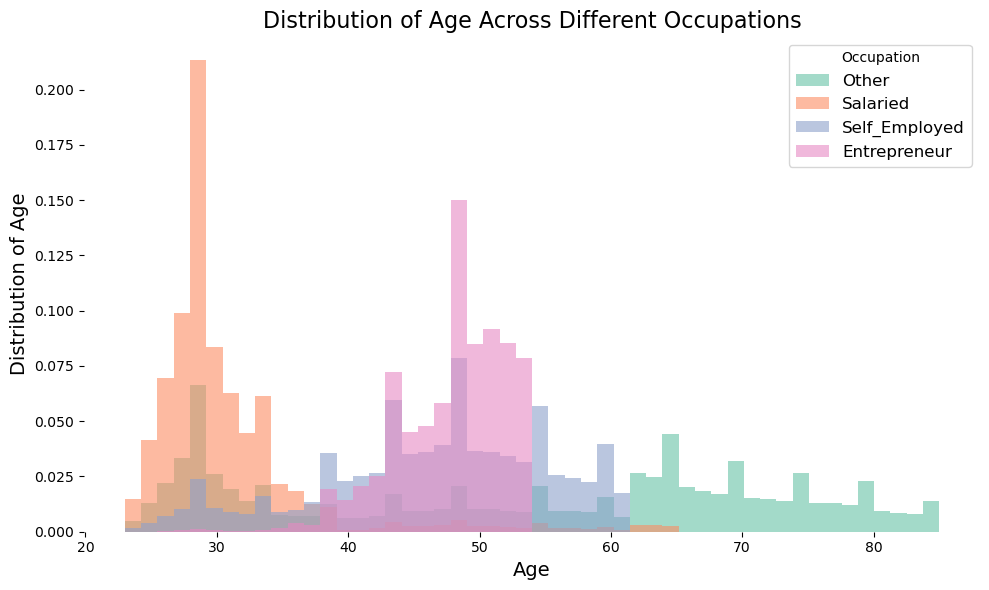

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define a better color palette
colors = sns.color_palette("Set2", 4)  # Using Set2 palette for softer colors

# Define the categories
categories = df['Occupation'].unique()
bin_range = (df['Age'].min(), df['Age'].max())

# Adjust figure size (wider, taller)
plt.figure(figsize=(10,6))

# Loop through categories and plot histograms with new colors and formatting
for i, c in enumerate(categories):
    plt.hist(df[df['Occupation'] == c]['Age'], 
             alpha=0.6,  # Adjust transparency for better visibility
             label=c, 
             range=bin_range, 
             bins=50, 
             density=True,  # Keep density to show fractions
             color=colors[i])  # Apply new colors

# Add labels and title
plt.ylabel('Distribution of Age', fontsize=14)
plt.xlabel('Age', fontsize=14)
plt.title('Distribution of Age Across Different Occupations', fontsize=16)

# Adjusting legend location to the top left
plt.legend(title="Occupation", fontsize=12, loc='upper right')

# Remove gridlines
plt.grid(False)

# Remove unnecessary spines for a cleaner look
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()


11. Credit Product predicting credit card intention 

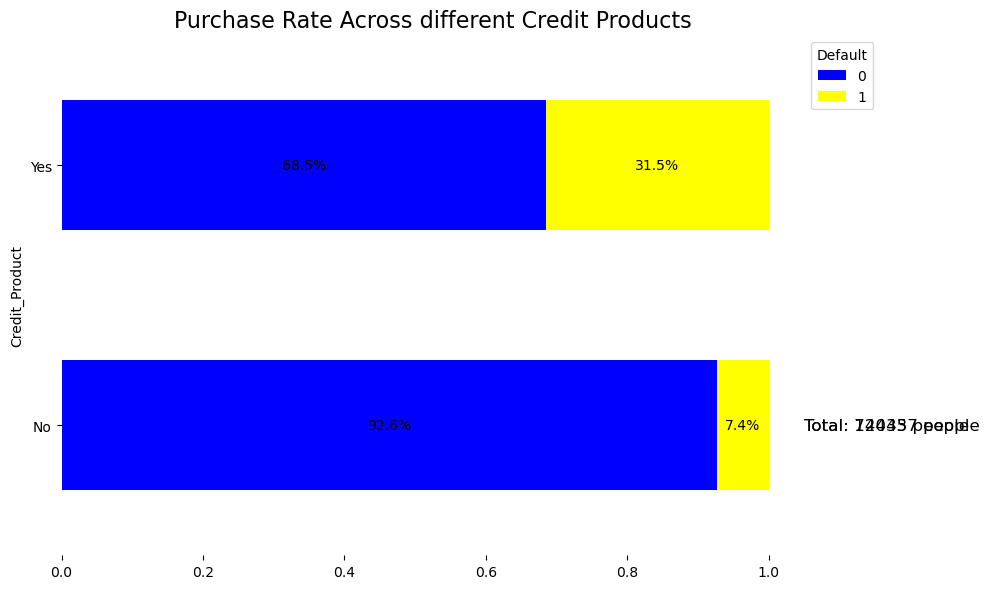

In [20]:
normalized_counts = df.groupby('Credit_Product')['Is_Lead'].value_counts(normalize=True).unstack()

# Calculate total number of people for each Credit_Product category
total_counts = df['Credit_Product'].value_counts()

# Create the horizontal bar plot
ax = normalized_counts.plot(kind='barh', stacked=True, figsize=(10, 6), color=['blue', 'yellow'])

# Set the title of the plot
ax.set_title("Purchase Rate Across different Credit Products", fontsize=16)
ax.legend(title='Default', bbox_to_anchor=(1, 1))

# Remove the spines for a cleaner look
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# Add text annotations for the percentages only (without raw counts)
for i, bars in enumerate(ax.containers):
    for j, bar in enumerate(bars):
        width = bar.get_width()
        if width > 0:  # Only annotate bars with a positive width
            x = bar.get_x() + width / 2
            y = bar.get_y() + bar.get_height() / 2
            percentage = f'{width * 100:.1f}%'
            
            # Only show percentage
            ax.text(x, y, f'{percentage}', ha='center', va='center', color='black')

# Add total number of people at the right side of each bar
for j, bar in enumerate(ax.patches[::2]):  # Iterate over the bars and add the totals
    total = total_counts.iloc[j]
    ax.text(1.05, bar.get_y() + bar.get_height()/2, f'Total: {total} people', va='center', fontsize=12)

# Adjust the layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()

12. Distribution of Vintage across different credit product

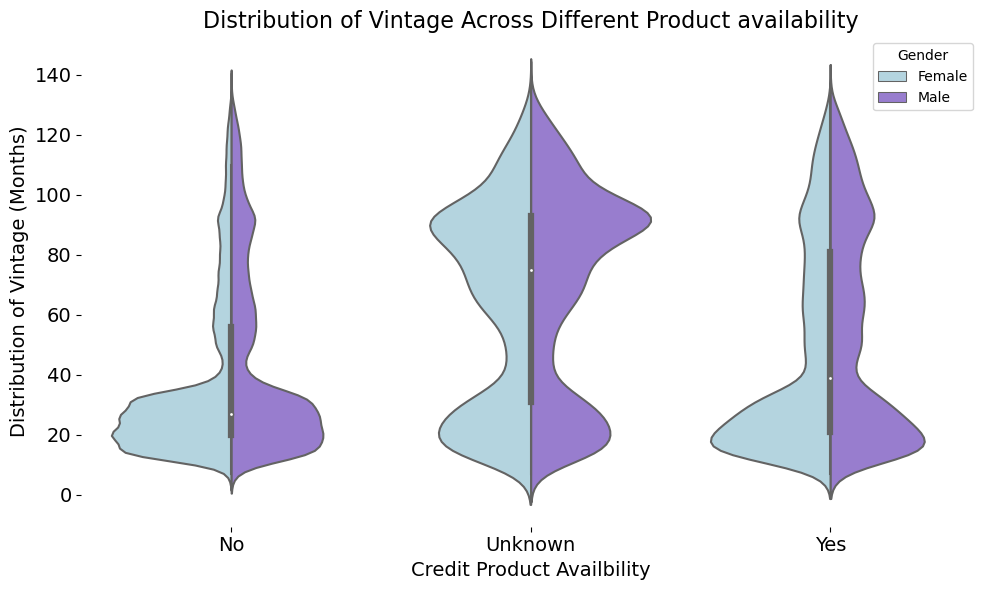

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Adjusting the colors to light blue and purple
mckinsey_colors = {
    'Female': '#ADD8E6',  # Light blue for female
    'Male': '#9370DB'     # Purple for male
}

# Calculate the purchase rate for each category
purchase_rate = df.groupby('Credit_Product')['Is_Lead'].mean() * 100

# Create the violin plot with light blue and purple
plt.figure(figsize=(10, 6))
ax = sns.violinplot(x='Credit_Product', y='Vintage', hue='Gender', split=True, data=df,
                    palette=[mckinsey_colors['Female'], mckinsey_colors['Male']])

# Set the title of the plot
ax.set_title("Distribution of Vintage Across Different Product availability", fontsize=16)

# Remove spines for a cleaner look
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xlabel("Credit Product Availbility", fontsize=14, color='black')
ax.set_ylabel("Distribution of Vintage (Months)", fontsize=14, color='black')
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)
# # Add purchase rate annotations to the plot
# for i, category in enumerate(purchase_rate.index):
#     rate = f'{purchase_rate[category]:.1f}%'
#     ax.text(i, 150, rate, ha='center', va='center', fontsize=12, color='black', fontweight='bold')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


In [25]:
df

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0
...,...,...,...,...,...,...,...,...,...,...,...
245720,BPAWWXZN,Male,51,RG284,Self_Employed,X3,109,Unknown,1925586,No,0
245721,HFNB7JY8,Male,27,RG268,Salaried,X1,15,No,862952,Yes,0
245722,GEHAUCWT,Female,26,RG281,Salaried,X1,13,No,670659,No,0
245723,GE7V8SAH,Female,28,RG273,Salaried,X1,31,No,407504,No,0


## Data Processing and Splitting 

In [7]:
df['Credit_Product'] = df['Credit_Product'].fillna('Unknown')

Split the Data 

In [112]:
from sklearn.model_selection import train_test_split

In [121]:
X_train, X_temp, y_train, y_temp = train_test_split(X, Y, test_size=0.4, stratify=Y, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)


data processing 

In [136]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler

Min_Max_Feature = ['Age','Vintage']
Standardize_Feature = ['Avg_Account_Balance']
One_Hot_Feature = X_train.columns.difference(['Age','Vintage','Avg_Account_Balance'])

preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(sparse_output=False,handle_unknown='ignore'), One_Hot_Feature),
        ('minmax', MinMaxScaler(), Min_Max_Feature),
        ('std', StandardScaler(), Standardize_Feature)])

clf = Pipeline(steps=[('preprocessor', preprocessor)])
X_train_prep = clf.fit_transform(X_train)
X_val_prep = clf.transform(X_val)
X_test_prep = clf.transform(X_test)


In [139]:
X_train_prep

array([[ 1.        ,  0.        ,  0.        , ...,  0.39344262,
         0.2890625 , -0.40456174],
       [ 1.        ,  0.        ,  0.        , ...,  0.14754098,
         0.15625   ,  0.43161941],
       [ 1.        ,  0.        ,  0.        , ...,  0.08196721,
         0.1015625 , -0.45708124],
       ...,
       [ 0.        ,  0.        ,  1.        , ...,  0.86885246,
         0.28125   , -0.71136415],
       [ 1.        ,  0.        ,  0.        , ...,  0.01639344,
         0.09375   , -0.14399974],
       [ 1.        ,  0.        ,  0.        , ...,  0.08196721,
         0.15625   ,  0.18185947]])

In [134]:
Min_Max_Feature = ['Age','Vintage']
Standardize_Feature = ['Avg_Account_Balance']
One_Hot_Feature = X_train.columns.difference(['Age','Vintage','Avg_Account_Balance'])

In [135]:
One_Hot_Feature

Index(['Channel_Code', 'Credit_Product', 'Gender', 'Is_Active', 'Occupation',
       'Region_Code'],
      dtype='object')

In [140]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler

# Define the feature sets for different transformations
Min_Max_Feature = ['Age', 'Vintage']
Standardize_Feature = ['Avg_Account_Balance']
One_Hot_Feature = X_train.columns.difference(['Age', 'Vintage', 'Avg_Account_Balance'])

# Create the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), One_Hot_Feature),
        ('minmax', MinMaxScaler(), Min_Max_Feature),
        ('std', StandardScaler(), Standardize_Feature)
    ])

# Create the pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor)])

# Fit and transform the training data
X_train_prep = clf.fit_transform(X_train)
X_val_prep = clf.transform(X_val)
X_test_prep = clf.transform(X_test)

# Get the feature names for each step
onehot_feature_names = clf.named_steps['preprocessor'].transformers_[0][1].get_feature_names_out(One_Hot_Feature)
minmax_feature_names = Min_Max_Feature
standardize_feature_names = Standardize_Feature

# Combine all feature names
all_feature_names = list(onehot_feature_names) + minmax_feature_names + standardize_feature_names

# Convert the output arrays into DataFrames with proper column names
X_train_df = pd.DataFrame(X_train_prep, columns=all_feature_names)
X_val_df = pd.DataFrame(X_val_prep, columns=all_feature_names)
X_test_df = pd.DataFrame(X_test_prep, columns=all_feature_names)

# Check the processed DataFrame
print(X_train_df.head())


   Channel_Code_X1  Channel_Code_X2  Channel_Code_X3  Channel_Code_X4  \
0              1.0              0.0              0.0              0.0   
1              1.0              0.0              0.0              0.0   
2              1.0              0.0              0.0              0.0   
3              0.0              1.0              0.0              0.0   
4              0.0              0.0              0.0              1.0   

   Credit_Product_No  Credit_Product_Yes  Credit_Product_nan  Gender_Female  \
0                0.0                 1.0                 0.0            1.0   
1                1.0                 0.0                 0.0            0.0   
2                1.0                 0.0                 0.0            0.0   
3                0.0                 1.0                 0.0            1.0   
4                0.0                 1.0                 0.0            0.0   

   Gender_Male  Is_Active_No  ...  Region_Code_RG278  Region_Code_RG279  \
0          

In [148]:
X_train_df.iloc[0:10,]

,Channel_Code_X1,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Credit_Product_No,Credit_Product_Yes,Credit_Product_nan,Gender_Female,Gender_Male,Is_Active_No,...,Region_Code_RG278,Region_Code_RG279,Region_Code_RG280,Region_Code_RG281,Region_Code_RG282,Region_Code_RG283,Region_Code_RG284,Age,Vintage,Avg_Account_Balance
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.393443,0.289062,-0.404562
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.147541,0.156250,0.431619
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.081967,0.101562,-0.457081
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.540984,0.437500,-0.110013
4,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.393443,0.000000,-0.348813
5,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.377049,0.578125,-0.642014
6,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.081967,0.187500,-0.247294
7,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.262295,0.187500,-0.099472
8,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.885246,0.656250,0.573852
9,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.442623,0.515625,-0.675958


In [149]:
X_train.iloc[0:10,]

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
233886,Female,48,RG268,Other,X1,44,Yes,783858,No
135361,Male,33,RG283,Salaried,X1,27,No,1496179,No
47861,Male,29,RG256,Salaried,X1,20,No,739118,No
72634,Female,57,RG283,Self_Employed,X2,63,Yes,1034776,No
243806,Male,48,RG283,Self_Employed,X4,7,Yes,831349,Yes
15428,Male,47,RG266,Self_Employed,X2,81,No,581579,No
87360,Female,29,RG275,Salaried,X1,31,No,917830,No
91748,Female,40,RG277,Other,X1,31,NaN,1043756,Yes
53914,Male,78,RG283,Other,X3,91,No,1617343,Yes
91846,Female,51,RG283,Self_Employed,X3,73,No,552663,Yes


In [150]:
df

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0
...,...,...,...,...,...,...,...,...,...,...,...
245720,BPAWWXZN,Male,51,RG284,Self_Employed,X3,109,NaN,1925586,No,0
245721,HFNB7JY8,Male,27,RG268,Salaried,X1,15,No,862952,Yes,0
245722,GEHAUCWT,Female,26,RG281,Salaried,X1,13,No,670659,No,0
245723,GE7V8SAH,Female,28,RG273,Salaried,X1,31,No,407504,No,0


In [177]:
df['Is_Lead'].sum()/len(df['Is_Lead'])

0.23720826126767727

In [180]:
len(df[df['Credit_Product'] == 'Unknown'])/len(df)

0.11934072642181301

In [182]:
X_train

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
233886,Female,48,RG268,Other,X1,44,Yes,783858,No
135361,Male,33,RG283,Salaried,X1,27,No,1496179,No
47861,Male,29,RG256,Salaried,X1,20,No,739118,No
72634,Female,57,RG283,Self_Employed,X2,63,Yes,1034776,No
243806,Male,48,RG283,Self_Employed,X4,7,Yes,831349,Yes
...,...,...,...,...,...,...,...,...,...
183993,Male,51,RG254,Self_Employed,X2,68,Yes,754123,No
168592,Male,54,RG268,Self_Employed,X3,110,Yes,705200,Yes
232753,Male,77,RG276,Other,X3,43,NaN,522501,Yes
220533,Male,25,RG251,Salaried,X1,19,No,1005824,Yes


In [185]:
X_train_df.shape

(147435, 53)